In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns

In [2]:
#get the datasets
train = pd.read_csv('train_HK6lq50.csv')
test = pd.read_csv('test_2nAIblo.csv')

### Exploratory analysis

In [3]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [5]:
train.shape

(73147, 16)

In [6]:
test.shape

(31349, 15)

In [7]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [8]:
#for column in train.columns:
#    print (column)
#    print (test[column].value_counts())
#    print ("\n")

In [9]:
train.corr()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
program_duration,1.000000,0.204855,0.148651,-0.022368,-0.018989,-0.010128,0.099243,0.003545
test_id,0.204855,1.000000,0.148945,-0.001891,-0.027592,-0.134198,0.323748,0.074568
trainee_id,0.148651,0.148945,1.000000,-0.010190,0.108862,-0.074630,0.030465,0.035900
city_tier,-0.022368,-0.001891,-0.010190,1.000000,-0.072843,0.016746,-0.052799,-0.068663
age,-0.018989,-0.027592,0.108862,-0.072843,1.000000,-0.071842,0.187405,0.073969
total_programs_enrolled,-0.010128,-0.134198,-0.074630,0.016746,-0.071842,1.000000,0.083781,-0.031695
trainee_engagement_rating,0.099243,0.323748,0.030465,-0.052799,0.187405,0.083781,1.000000,0.197383
is_pass,0.003545,0.074568,0.035900,-0.068663,0.073969,-0.031695,0.197383,1.000000


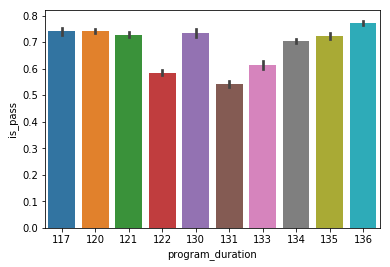

In [10]:
sns.barplot(train.program_duration, train.is_pass)

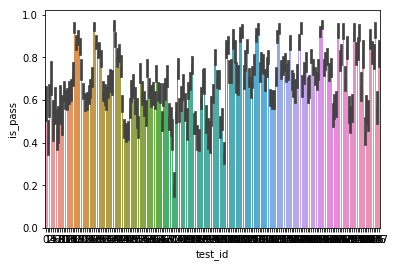

In [11]:
sns.barplot(train.test_id, train.is_pass)

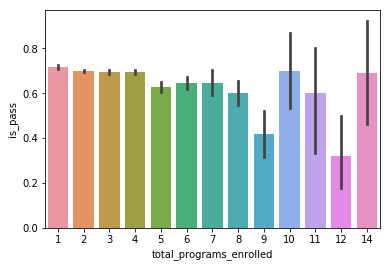

In [12]:
sns.barplot(train.total_programs_enrolled, train.is_pass)

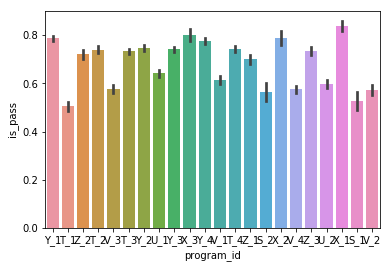

In [13]:
sns.barplot(train.program_id, train.is_pass)

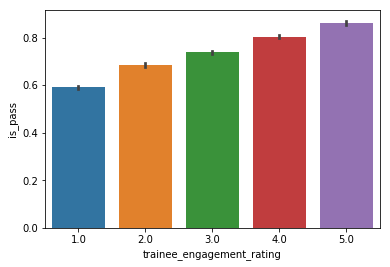

In [14]:
sns.barplot(train.trainee_engagement_rating, train.is_pass)

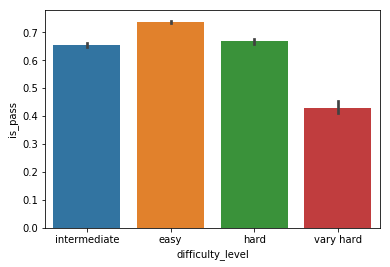

In [15]:
sns.barplot(train.difficulty_level, train.is_pass)

### Encoding education and difficulty

In [3]:
def label_encode_diff(x):
    switcher = {
        'easy':1,
        'intermediate':2,
        'hard':3,
        'vary hard':4
    }
    return switcher.get(x,0)

In [4]:
train["difficulty_level"] = train["difficulty_level"].apply(lambda x: label_encode_diff(x))
test["difficulty_level"] = test["difficulty_level"].apply(lambda x: label_encode_diff(x))


In [5]:
train["difficulty_level"].value_counts()

1    40101
2    20668
3    10297
4     2081
Name: difficulty_level, dtype: int64

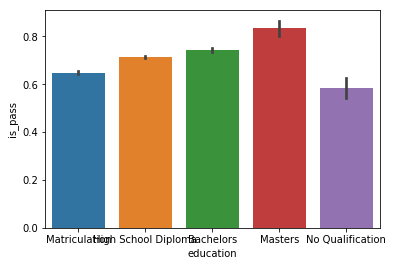

In [6]:
sns.barplot(train.education, train.is_pass)

In [7]:
def label_encode_edu(x):
    switcher = {
        'High School Diploma':1,
        'Matriculation':2,
        'Bachelors':3,
        'Masters':4
    }
    return switcher.get(x,0)

In [8]:
train['education'].value_counts()

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64

In [9]:
train['education']=train['education'].apply(lambda x:label_encode_edu(x))
test['education']=test['education'].apply(lambda x:label_encode_edu(x))

In [10]:
train['education'].value_counts()

1    34371
2    26169
3    11581
0      514
4      512
Name: education, dtype: int64

In [11]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,2,9389,M,2,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,1,16523,F,1,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,1,13987,M,2,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,1,13158,F,2,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,2,10591,F,1,1,42.0,2,N,4.0,1


### Get dummies

In [12]:
dummy_fields = ["city_tier","gender","is_handicapped","program_id","test_type", "program_duration","program_type"] # no program_duration test_id for it's feature importance

for item in dummy_fields:
    dummies = pd.get_dummies(train.loc[:, item], prefix=item) 
    train = pd.concat([train, dummies], axis = 1)
    train = train.drop(item, axis =1)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 58 columns):
id                           73147 non-null object
test_id                      73147 non-null int64
difficulty_level             73147 non-null int64
trainee_id                   73147 non-null int64
education                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
city_tier_1                  73147 non-null uint8
city_tier_2                  73147 non-null uint8
city_tier_3                  73147 non-null uint8
city_tier_4                  73147 non-null uint8
gender_F                     73147 non-null uint8
gender_M                     73147 non-null uint8
is_handicapped_N             73147 non-null uint8
is_handicapped_Y             73147 non-null uint8
program_id_S_1               73147 n

In [14]:
dummy_fields = ["city_tier","gender","is_handicapped","program_id","test_type", "program_duration","program_type"] # no program_duration test_id for it's feature importance

for item in dummy_fields:
    dummies = pd.get_dummies(test.loc[:, item], prefix=item) 
    test = pd.concat([test, dummies], axis = 1)
    test = test.drop(item, axis =1)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 57 columns):
id                           31349 non-null object
test_id                      31349 non-null int64
difficulty_level             31349 non-null int64
trainee_id                   31349 non-null int64
education                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
trainee_engagement_rating    31318 non-null float64
city_tier_1                  31349 non-null uint8
city_tier_2                  31349 non-null uint8
city_tier_3                  31349 non-null uint8
city_tier_4                  31349 non-null uint8
gender_F                     31349 non-null uint8
gender_M                     31349 non-null uint8
is_handicapped_N             31349 non-null uint8
is_handicapped_Y             31349 non-null uint8
program_id_S_1               31349 non-null uint8
program_id_S_2               31349 n

### Missing data 

In [16]:
train['age'].fillna(train['age'].median(),inplace=True)
test['age'].fillna(test['age'].median(),inplace=True)
train['trainee_engagement_rating']=train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0])
test['trainee_engagement_rating']=test['trainee_engagement_rating'].fillna(test['trainee_engagement_rating'].mode()[0])

In [17]:
train.head()

,id,test_id,difficulty_level,trainee_id,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass,city_tier_1,...,program_duration_134,program_duration_135,program_duration_136,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z
0,9389_150,150,2,9389,2,24.0,5,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,16523_44,44,1,16523,1,26.0,2,3.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,13987_178,178,1,13987,2,40.0,1,2.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,13158_32,32,1,13158,2,39.0,4,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,10591_84,84,2,10591,1,42.0,2,4.0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
train.columns

Index(['id', 'test_id', 'difficulty_level', 'trainee_id', 'education', 'age',
       'total_programs_enrolled', 'trainee_engagement_rating', 'is_pass',
       'city_tier_1', 'city_tier_2', 'city_tier_3', 'city_tier_4', 'gender_F',
       'gender_M', 'is_handicapped_N', 'is_handicapped_Y', 'program_id_S_1',
       'program_id_S_2', 'program_id_T_1', 'program_id_T_2', 'program_id_T_3',
       'program_id_T_4', 'program_id_U_1', 'program_id_U_2', 'program_id_V_1',
       'program_id_V_2', 'program_id_V_3', 'program_id_V_4', 'program_id_X_1',
       'program_id_X_2', 'program_id_X_3', 'program_id_Y_1', 'program_id_Y_2',
       'program_id_Y_3', 'program_id_Y_4', 'program_id_Z_1', 'program_id_Z_2',
       'program_id_Z_3', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_

In [19]:
train_features = train#.drop(['program_type'], axis=1)
test_features = test#.drop(['program_type'], axis=1)

In [20]:
train_features.to_csv("train_feature.csv",index=False)
test_features.to_csv("test_feature.csv",index=False)

In [21]:
from sklearn.model_selection import train_test_split
y = train_features.is_pass.values
train_features.drop(['id', 'is_pass'], inplace=True, axis=1)

In [22]:
x, x_test, y, y_test = train_test_split(train_features, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
train_data = lgb.Dataset(x, label=y)
test_data = lgb.Dataset(x_test, label=y_test)

In [24]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'dart',
    'verbose': 0,
    'num_leaves': 1023,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_bins':300,
    'xgboost_dart_mode':'true'
}

In [25]:
model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       early_stopping_rounds=50,
                       num_boost_round=5000
                       )

[1]	valid_0's auc: 0.703616
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.719129
[3]	valid_0's auc: 0.725776
[4]	valid_0's auc: 0.730983
[5]	valid_0's auc: 0.733537
[6]	valid_0's auc: 0.736661
[7]	valid_0's auc: 0.739868
[8]	valid_0's auc: 0.741298
[9]	valid_0's auc: 0.7451
[10]	valid_0's auc: 0.746556
[11]	valid_0's auc: 0.748807
[12]	valid_0's auc: 0.749821
[13]	valid_0's auc: 0.751751
[14]	valid_0's auc: 0.752873
[15]	valid_0's auc: 0.754756
[16]	valid_0's auc: 0.75581
[17]	valid_0's auc: 0.756211
[18]	valid_0's auc: 0.756534
[19]	valid_0's auc: 0.756683
[20]	valid_0's auc: 0.756754
[21]	valid_0's auc: 0.757355
[22]	valid_0's auc: 0.75838
[23]	valid_0's auc: 0.75882
[24]	valid_0's auc: 0.75926
[25]	valid_0's auc: 0.759552
[26]	valid_0's auc: 0.760315
[27]	valid_0's auc: 0.761086
[28]	valid_0's auc: 0.76117
[29]	valid_0's auc: 0.761677
[30]	valid_0's auc: 0.762358
[31]	valid_0's auc: 0.76251
[32]	valid_0's auc: 0.763344
[33]	valid_0's auc: 0.76394

[279]	valid_0's auc: 0.794468
[280]	valid_0's auc: 0.794472
[281]	valid_0's auc: 0.794505
[282]	valid_0's auc: 0.794631
[283]	valid_0's auc: 0.794826
[284]	valid_0's auc: 0.794826
[285]	valid_0's auc: 0.794832
[286]	valid_0's auc: 0.795046
[287]	valid_0's auc: 0.795051
[288]	valid_0's auc: 0.794979
[289]	valid_0's auc: 0.795191
[290]	valid_0's auc: 0.795126
[291]	valid_0's auc: 0.795133
[292]	valid_0's auc: 0.795303
[293]	valid_0's auc: 0.795306
[294]	valid_0's auc: 0.795312
[295]	valid_0's auc: 0.795343
[296]	valid_0's auc: 0.79533
[297]	valid_0's auc: 0.795333
[298]	valid_0's auc: 0.795336
[299]	valid_0's auc: 0.795341
[300]	valid_0's auc: 0.79553
[301]	valid_0's auc: 0.795612
[302]	valid_0's auc: 0.795614
[303]	valid_0's auc: 0.795686
[304]	valid_0's auc: 0.795683
[305]	valid_0's auc: 0.795642
[306]	valid_0's auc: 0.795644
[307]	valid_0's auc: 0.795643
[308]	valid_0's auc: 0.795535
[309]	valid_0's auc: 0.795536
[310]	valid_0's auc: 0.795537
[311]	valid_0's auc: 0.795443
[312]	valid_

In [26]:
ids = test_features['id'].values
x= test_features.drop('id', axis=1).values
y = model.predict(x)

In [27]:
output = pd.DataFrame({'id': ids, 'is_pass': y})
output.to_csv("submission.csv", index=False)

In [28]:
gain = model.feature_importance('gain')
ft = pd.DataFrame({'feature':model.feature_name(), 'split':model.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(ft.head(25))

                      feature   split       gain
2                  trainee_id  136739  26.468852
0                     test_id   91046  18.806286
4                         age   58074  10.415489
6   trainee_engagement_rating   12667   9.289375
37          test_type_offline    3037   4.339305
5     total_programs_enrolled   23558   4.336088
3                   education   20550   4.064780
1            difficulty_level    9853   2.842508
9                 city_tier_3   12595   2.051812
7                 city_tier_1   10902   2.002599
11                   gender_F    8980   1.603776
42       program_duration_122    1172   1.524724
8                 city_tier_2    8617   1.476987
53             program_type_X    1057   0.951394
21             program_id_U_1    1013   0.888360
13           is_handicapped_N    4081   0.883624
10                city_tier_4    3772   0.865177
51             program_type_U     937   0.773989
26             program_id_V_4    1192   0.604963
12                  